In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
data  = pd.read_csv('Ahmedabad.csv')
data.describe()
data.head()


,city,date,rate
0,Ahmedabad,2019-04-22,70.32
1,Ahmedabad,2019-04-22,70.32
2,Ahmedabad,2019-04-22,70.32
3,Ahmedabad,2019-04-22,70.32
4,Ahmedabad,2019-04-22,70.32


In [5]:
print(data.isnull().sum())

city    0
date    0
rate    0
dtype: int64


In [6]:
# imputer = SimpleImputer(strategy='mean')
# data[['Open', 'High', 'Low', 'Volume']] = imputer.fit_transform(data[['Open', 'High', 'Low', 'Volume']])
# data[['Close', 'Adj Close']] = imputer.fit_transform(data[['Close', 'Adj Close']])

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(-200.0, 0, '2021-07-07'),
  Text(0.0, 0, '2019-04-22'),
  Text(200.0, 0, '2019-04-27'),
  Text(400.0, 0, '2019-06-03'),
  Text(600.0, 0, '2020-08-21'),
  Text(800.0, 0, '2021-06-13'),
  Text(1000.0, 0, '2022-01-04'),
  Text(1200.0, 0, '')])

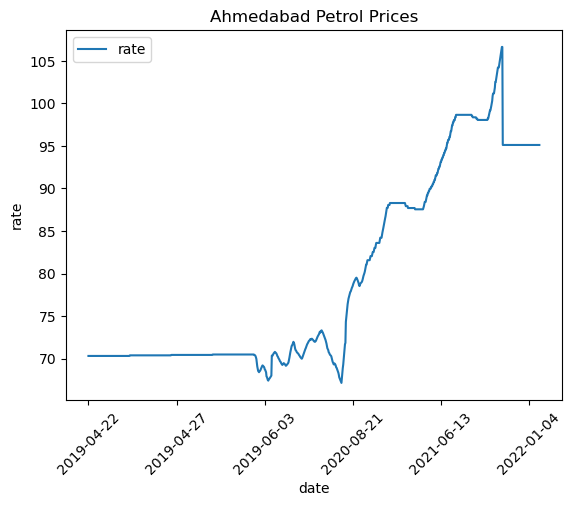

In [7]:
data.plot(x='date', y='rate')
plt.xlabel("date")
plt.ylabel("rate")
plt.title("Ahmedabad Petrol Prices")
plt.xticks(rotation = 45)

In [8]:
X = data[['rate']].values
y = data['rate'].values

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 1)

In [10]:
from sklearn.svm import SVR
#svr = SVR()
svr = SVR(C=0.025)
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)

svr.predict(X)

array([78.51310719, 78.51310719, 78.51310719, ..., 78.51310719,
       78.51310719, 78.51310719])

In [11]:
from sklearn.metrics import r2_score
print(f"Accuracy:{r2_score(y_test,y_pred)}")

Accuracy:0.6602890259023145


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
correlation = np.corrcoef(y_test, y_pred)[0, 1]
mean_actual = np.mean(y_test)
mean_predicted = np.mean(y_pred)
print(y_test)
print(y_pred
     )
print(y_test.shape)
print(y_pred.shape)

[ 98.02  92.33  71.53  96.73  98.65  70.39  70.32  95.11  87.7   91.01
  70.98  98.65  86.47  78.86  70.49  70.44  88.29  70.44  70.32  70.39
  70.32  82.05  78.37  69.48  70.39  95.11  70.44 101.16  70.44  70.49
  70.35  88.29  70.39  71.09  69.21  88.42  98.65  95.11  70.44  70.39
 105.22  70.32  95.11  70.49  71.53  89.18  70.32  90.3   70.39  95.11
  88.29  70.32  79.52  70.39 106.63  70.39  70.44  95.11  70.32  71.
  70.32  78.66  70.24  91.54  95.11  69.9   95.11  70.44  95.11  70.64
  70.39 101.16  70.42  98.65  70.49  70.32  72.04 100.    72.23  89.18
  70.04  70.32  95.11  95.11  70.44  70.44  70.23  87.91  87.7   68.89
  70.39  70.44  70.39  70.44  70.32  69.99  70.39  98.05  69.99  70.49
  70.44  87.05  70.44  72.18  93.64  87.7   70.39  93.9   92.57  70.32
  78.95  70.44  70.36  95.11  68.5   95.72  68.4   70.39  73.28 104.88
  70.44  70.32  98.05  93.9   69.84  70.69  68.48  88.29  88.29  70.44
  70.32  95.11  70.49  70.49  98.05  67.3   99.42  98.65  70.83  70.44
  70.49 

In [13]:
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"r2_score:{r2_score(y_test,y_pred)}")
print(f"Correlation between Actual and Predicted: {correlation}")
print(f"Mean of Actual Values: {mean_actual}")
print(f"Mean of Predicted Values: {mean_predicted}")

MSE: 46.00192793474147
MAE: 4.092908138668921
RMSE: 6.782472110870893
r2_score:0.6602890259023145
Correlation between Actual and Predicted: 0.9593189113382413
Mean of Actual Values: 79.60473170731707
Mean of Predicted Values: 76.12111166156589


[84.16307663 84.82868212 71.16782547 84.47679735 83.9822837  70.76986084
 70.75201478 84.74602888 83.73894858 84.68195302 70.95078711 83.9822837
 83.16796297 77.14547529 70.79669297 70.78308034 83.96958559 70.78308034
 70.75201478 70.76986084 70.75201478 80.11970513 76.66175178 70.59822682
 70.76986084 84.74602888 70.78308034 83.12573973 70.78308034 70.79669297
 70.75956857 83.96958559 70.76986084 70.99050084 70.572432   84.01667778
 83.9822837  84.74602888 70.78308034 70.76986084 81.54733163 70.75201478
 84.74602888 70.79669297 71.16782547 84.26535832 70.75201478 84.55035622
 70.76986084 84.74602888 83.96958559 70.75201478 77.79168375 70.76986084
 81.02599822 70.76986084 70.78308034 84.74602888 70.75201478 70.95786911
 70.75201478 76.94826637 70.73256505 84.75595808 84.74602888 70.66118104
 84.74602888 70.78308034 84.74602888 70.83988488 70.76986084 83.12573973
 70.77774534 83.9822837  70.79669297 70.75201478 71.40949819 83.54450827
 71.50915657 84.26535832 70.68836145 70.75201478 84.

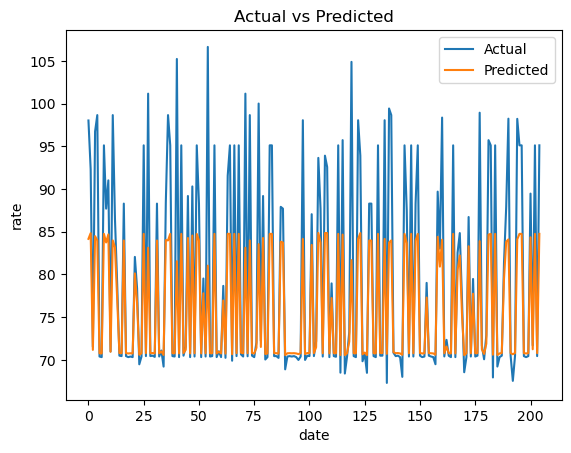

In [14]:
print(y_pred)
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")

plt.xlabel("date")
plt.ylabel("rate")
plt.legend()
plt.title("Actual vs Predicted")
plt.show()